In [3]:
# Importing the libraries
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()

Saving imdb_master.csv to imdb_master.csv


In [4]:
# Reading the Data file
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
print(df.head())

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [6]:
# Features and Target Extraction
reviews = df['review'].values
y = df['label'].values                    

In [7]:
# Tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(reviews)

In [8]:
# getting the vocabulary of data
reviews_mat = tokenizer.texts_to_matrix(reviews)

In [9]:
# Label Encoding the Target ,Splitting the data
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(reviews_mat, y, test_size=0.25, random_state=1000)

In [10]:
# Assigning Input Dimension value
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [11]:
#  Model Implementation
model = Sequential()
model.add(layers.Dense(300,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 8s 107us/step - loss: 0.8802 - acc: 0.5055 - val_loss: 0.8421 - val_acc: 0.5132
Epoch 2/5
75000/75000 [==============================] - 8s 104us/step - loss: 0.7914 - acc: 0.5762 - val_loss: 0.8399 - val_acc: 0.5148
Epoch 3/5
75000/75000 [==============================] - 8s 102us/step - loss: 0.6904 - acc: 0.6763 - val_loss: 0.8731 - val_acc: 0.5146
Epoch 4/5
75000/75000 [==============================] - 8s 102us/step - loss: 0.5062 - acc: 0.8097 - val_loss: 0.9624 - val_acc: 0.5160
Epoch 5/5
75000/75000 [==============================] - 8s 102us/step - loss: 0.2991 - acc: 0.9194 - val_loss: 1.0822 - val_acc: 0.5136


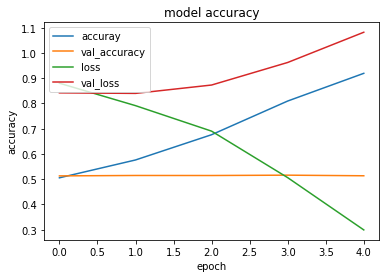

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [13]:
# Adding Embedding Layer

from keras.preprocessing.sequence import pad_sequences
pureReviews = df['review'].values
max_review_len= max([len(s.split()) for s in pureReviews])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureReviews)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)

176408
2470


In [14]:
# Model implementation with Embedding Layer
from keras.layers import Embedding, Flatten
model1 = Sequential()
model1.add(Embedding(vocab_size, 50, input_length=max_review_len))
model1.add(Flatten())
model1.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model1.add(layers.Dense(3, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=model1.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 491s 7ms/step - loss: 1.0538 - acc: 0.4897 - val_loss: 0.8686 - val_acc: 0.5015
Epoch 2/5
75000/75000 [==============================] - 488s 7ms/step - loss: 0.8306 - acc: 0.5325 - val_loss: 0.8389 - val_acc: 0.4988
Epoch 3/5
75000/75000 [==============================] - 495s 7ms/step - loss: 0.7579 - acc: 0.6127 - val_loss: 0.8762 - val_acc: 0.4956
Epoch 4/5
75000/75000 [==============================] - 493s 7ms/step - loss: 0.6320 - acc: 0.7093 - val_loss: 0.9631 - val_acc: 0.4878
Epoch 5/5
75000/75000 [==============================] - 493s 7ms/step - loss: 0.4806 - acc: 0.7993 - val_loss: 1.1372 - val_acc: 0.4862


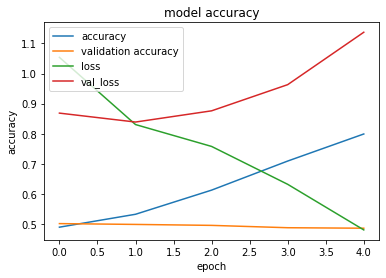

In [15]:
# plotting loss and accuracy using history obj
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [16]:

# Applying the same for 20news data 
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences = newsgroups_train.data
y = newsgroups_train.target

max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

model2 = Sequential()
model2.add(Embedding(vocab_size, 50, input_length=max_review_len))
model2.add(Flatten())
model2.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model2.add(layers.Dense(20, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
historynew=model2.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 281s 33ms/step - loss: 12.6356 - acc: 0.0548 - val_loss: 3.0608 - val_acc: 0.0541
Epoch 2/5
8485/8485 [==============================] - 280s 33ms/step - loss: 2.9975 - acc: 0.0590 - val_loss: 2.9808 - val_acc: 0.0792
Epoch 3/5
8485/8485 [==============================] - 279s 33ms/step - loss: 2.9629 - acc: 0.0706 - val_loss: 2.9773 - val_acc: 0.0622
Epoch 4/5
8485/8485 [==============================] - 285s 34ms/step - loss: 2.9244 - acc: 0.0717 - val_loss: 2.9298 - val_acc: 0.0739
Epoch 5/5
8485/8485 [==============================] - 286s 34ms/step - loss: 2.8670 - acc: 0.0897 - val_loss: 2.9165 - val_acc: 0.0657


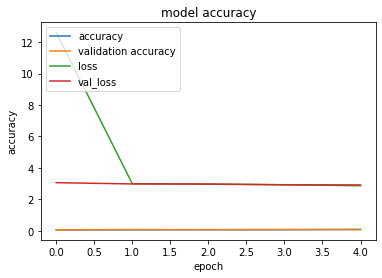

In [17]:
# plotting loss and accuracy using history obj
import matplotlib.pyplot as plt
plt.plot(historynew.history['acc'])
plt.plot(historynew.history['val_acc'])
plt.plot(historynew.history['loss'])
plt.plot(historynew.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [18]:
# predicting over the 4th sample data
print("Actual Value:",y_test[4],"Predicted Value",model2.predict_classes(X_test[[4],:]))

Actual Value: 4 Predicted Value [16]
